In [1]:
from bstpp.main import LGCP_Model, Hawkes_Model, load_Chicago_Shootings, load_Boko_Haram
import numpyro.distributions as dist
import numpy as np

# Chicago Shootings Dataset

### Cox Hawkes Model

In [2]:
data = load_Chicago_Shootings()

In [3]:
column_names = ['UNEMP_DENS','MEDINC','MED_HV','assoc_plus','VACANT_DEN',
       'VAC_HU_pct','HCUND20K_L','POP_DENS','CT_SP_WCHI']
model = Hawkes_Model(data['events_2022'],
                     data['boundaries'],True,
                     spatial_cov=data['covariates'],cov_names = column_names,
                     a_0=dist.Normal(1,10), alpha = dist.Beta(20,60),
                     beta=dist.HalfNormal(2.0)
                    )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:111: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:213: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersect['area'] = intersect.area/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))


100%|████████████████████| 1500/1500 [01:42<00:00, 14.58it/s, init loss: -8478.0518, avg. loss [1426-1500]: -17931.5488]



SVI elapsed time: 115.6107063293457


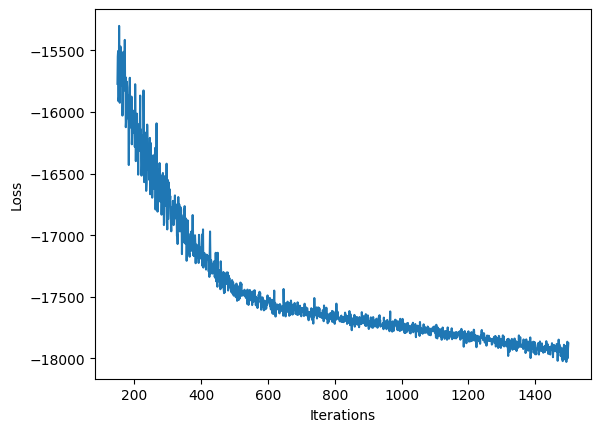

In [4]:
model.run_svi(lr=0.02,num_steps=10000)

In [7]:
model.log_expected_likelihood(data['events_2023'])

7508.69970703125

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.520306,0.027296,19.061537,0.0,0.467701,0.576429
beta,15.373386,0.871937,17.631311,0.0,13.743285,17.193627
sigmax_2,0.000014,0.000002,8.793220,0.0,0.000011,0.000017


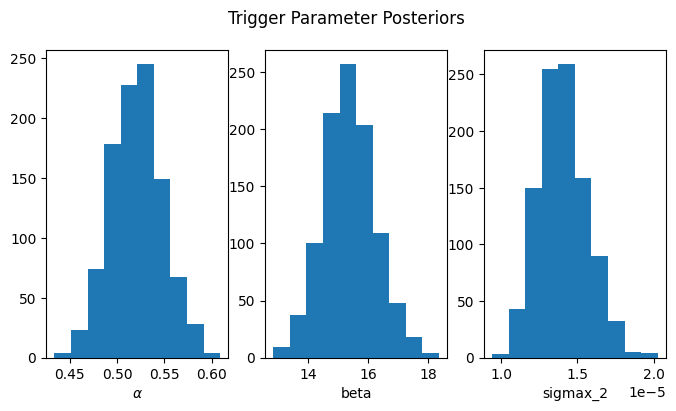

In [8]:
model.plot_trigger_posterior()

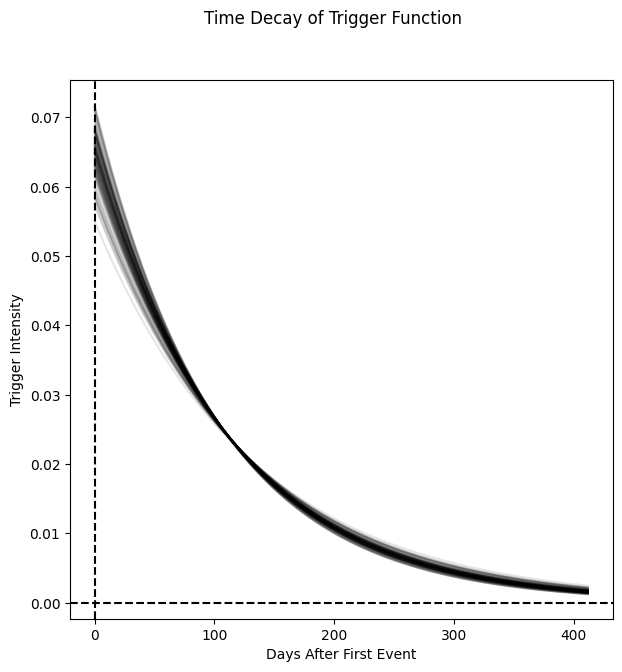

In [12]:
model.plot_trigger_time_decay()

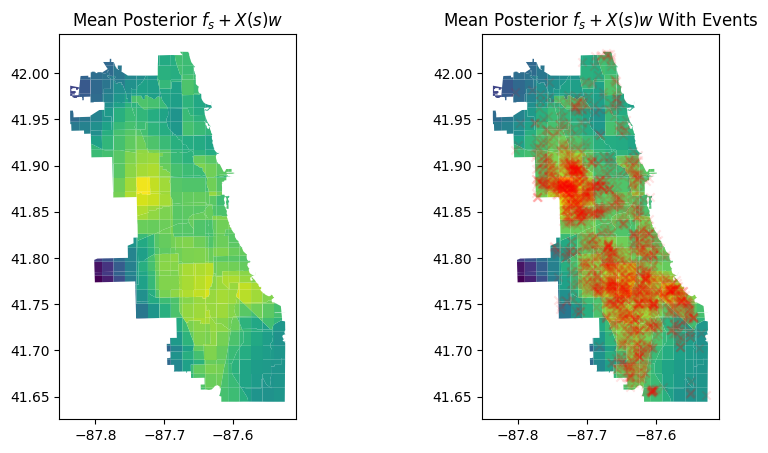

In [9]:
model.plot_spatial(include_cov=True)

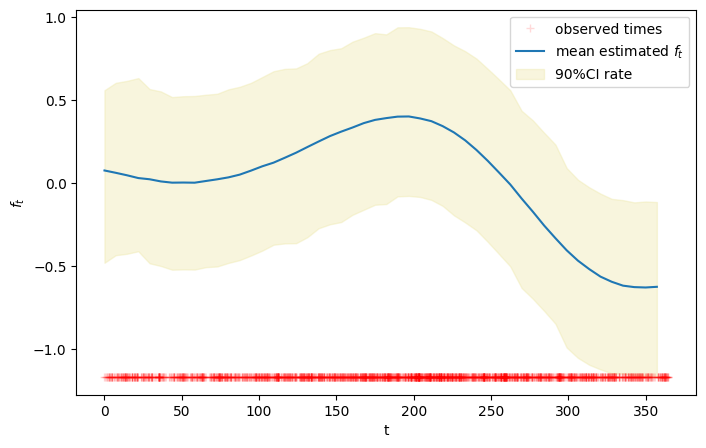

In [10]:
model.plot_temporal()

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
UNEMP_DENS,0.305920,0.062256,4.913893,8.928535e-07,0.189042,0.431640
MEDINC,0.007575,0.081746,0.092661,9.261727e-01,-0.152556,0.176008
MED_HV,-0.091422,0.098997,-0.923488,3.557532e-01,-0.282909,0.116290
assoc_plus,-0.133673,0.089965,-1.485834,1.373232e-01,-0.306296,0.040750
VACANT_DEN,0.112097,0.039027,2.872324,4.074655e-03,0.037455,0.183077
VAC_HU_pct,0.091525,0.039594,2.311607,2.079934e-02,0.017116,0.165485
HCUND20K_L,0.094795,0.026915,3.521999,4.283062e-04,0.040080,0.144930
POP_DENS,0.494201,0.051905,9.521296,0.000000e+00,0.394197,0.595594
CT_SP_WCHI,-0.150349,0.045118,-3.332335,8.612067e-04,-0.236931,-0.063015
a_0,2.652212,0.360215,7.362851,1.800782e-13,1.940980,3.359022


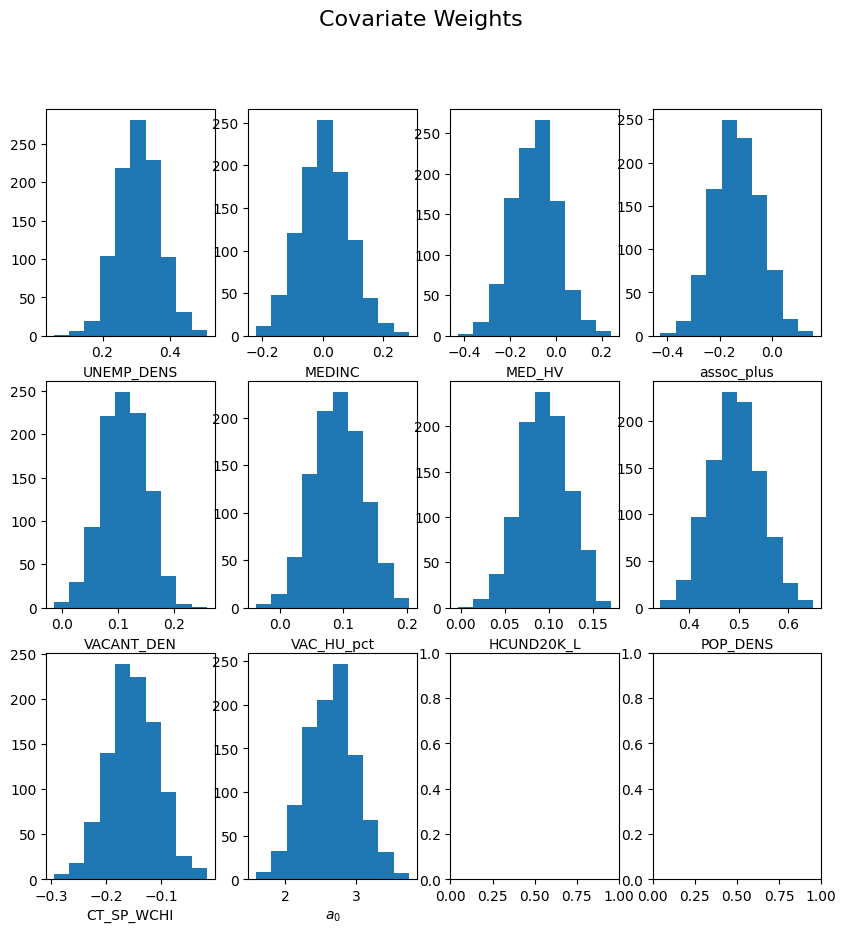

In [11]:
model.cov_weight_post_summary()

# Boko Haram Dataset

### Log Gaussian Cox Process Model

In [4]:
data = load_Boko_Haram()
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
lgcp_bh_model = LGCP_Model(data['events'],data['boundaries'],
                            spatial_cov=data['covariates'],cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(1,10)
                           )

In [3]:
lgcp_bh_model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:36<00:00, 41.45it/s, 511 steps of size 1.25e-02. acc. prob=0.95]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -3.18      0.61     -3.19     -4.13     -2.16    491.08      1.00
          w[0]     -0.39      0.11     -0.39     -0.59     -0.22    658.23      1.00
          w[1]     -0.07      0.05     -0.07     -0.16     -0.00    651.68      1.00
          w[2]     -0.05      0.03     -0.05     -0.09      0.00    837.27      1.00
          w[3]      0.13      0.07      0.13      0.02      0.24    867.39      1.00
          w[4]      0.63      0.08      0.63      0.51      0.75   1055.48      1.00
          w[5]      0.18      0.04      0.18      0.12      0.23    906.50      1.00
          w[6]      0.78      0.04      0.78      0.72      0.86    927.72      1.00
          w[7]     -0.12      0.04     -0.12     -0.19     -0.05    994.49      1.00
          w[8]      0.78      0.08      0.78      0.67      0.93    661.91      1.00
          w[9]      0.58      0.05      0.58      0.50      0.67

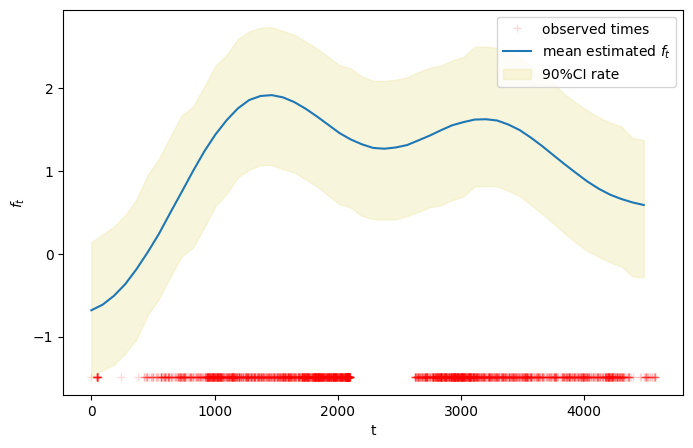

In [4]:
lgcp_bh_model.plot_temporal()

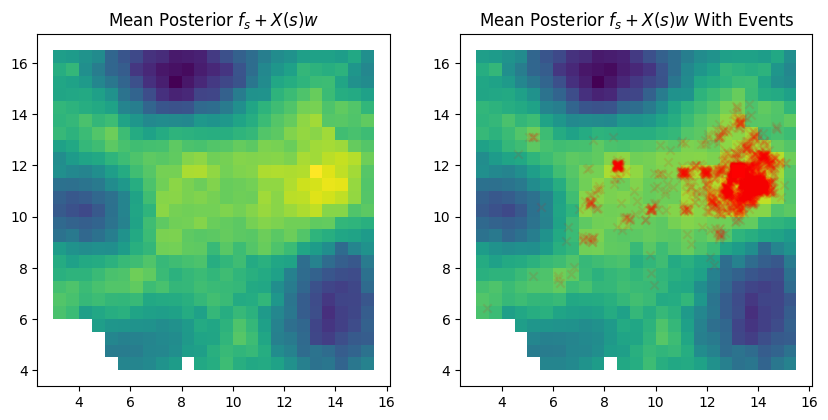

In [5]:
lgcp_bh_model.plot_spatial(include_cov=True)

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,-0.393704,0.113655,-3.464037,5.321333e-04,-0.616811,-0.171760
urban_ih_log,-0.068996,0.047387,-1.455993,1.453947e-01,-0.157801,0.025017
droughtyr_speigdm,-0.046708,0.028325,-1.649012,9.914511e-02,-0.098879,0.011444
herb_gc,0.128528,0.066626,1.929096,5.371897e-02,-0.001818,0.256239
capdist,0.631130,0.075291,8.382559,0.000000e+00,0.480287,0.783103
grass_ih_log,0.179572,0.036071,4.978258,6.415900e-07,0.108358,0.247056
nlights_sd_log,0.780560,0.042008,18.581089,0.000000e+00,0.700161,0.859844
water_gc_log,-0.122108,0.041723,-2.926630,3.426567e-03,-0.198359,-0.039363
pop_gpw_sd_log,0.782923,0.076487,10.236053,0.000000e+00,0.627051,0.931252
pasture_ih,0.582839,0.050643,11.508811,0.000000e+00,0.487036,0.681689


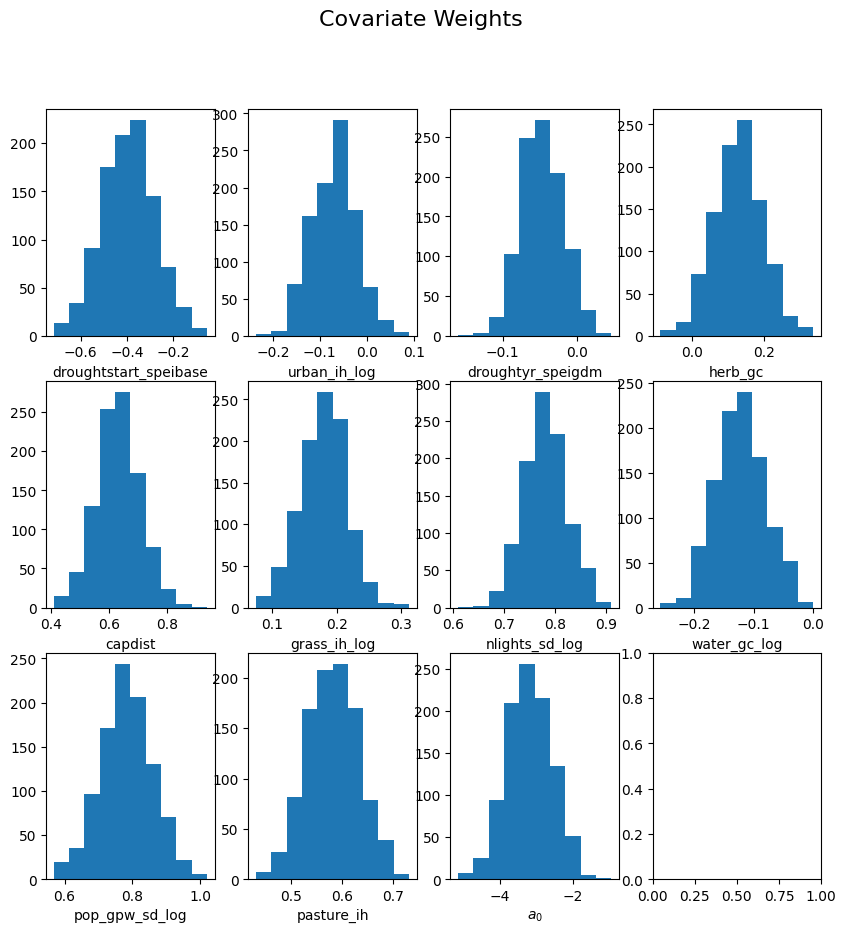

In [6]:
lgcp_bh_model.cov_weight_post_summary()